Данная обзорная статья описывает принципы функционирования байесовских сетей. Статья написана в соавторстве ученым в области ИИ Джудой Перлом, который и разработал эти сети, а также написал две книги о вероятностном подходе и поиске причинно-следственной связи в искусственном интеллекте.

*Примечание.* Приведенный ниже конспект статьи не слишком отличается от оригинала на английском языке. Статья написана настолько понятно и лаконично, что я рекомендую читать ее в оригинале. Следуя своему принципу рассказывать весь важный материал из статьи, делая обзор на нее, я должен был бы пересказать ее почти дословно. В общем я так и делаю, поэтому данный текст, особенно его вторую половину, можно считать вольным переводом статьи с небольшим сокращением.

### Неформальное описание байесовских сетей

Байесовские сети также называются "сетями доверия" (belief networks). Мне (*автору данного обзора на статью*), впрочем, этот перевод кажется неточным, и скорее следует переводить как "сети предположений". Байесовская сеть является ациклическим направленным графом (набором вершин, некоторые из которых соединены стрелками так, что граф не содержит циклов). Каждая вершины описывает некий параметр. Входящие в вершину стрелки содержат информацию о том, как этот параметр зависит от других параметров, причем все зависимости носят вероятностный характер. Чуть позже мы рассмотрим это подробнее. Пока что важно понять главнгое свойство байесовских сетей: зафиксировав значения какого-то подмножества параметров, мы можем рассчитать распределения вероятностей для всех остальных параметров.

По [этой ссылке](https://www.bayesserver.com/examples/networks/asia) можно найти интерактивный пример байесовской сети.

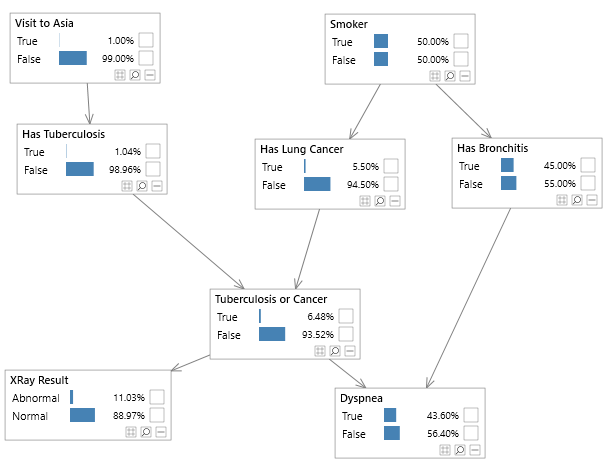

Байесовские сети основаны на теории вероятностей. Начнем с понятия **совместного распределения** набора случайных величин. Это понятие сложно строго объяснить в двух словах, но неформально говоря совместным распределением случайных величин является *любая зависимость между этими величинами*. Эта зависимость может быть как строгой, так и вероятностной (стохастической).

Зависимости могут быть самыми разнообразными, в том числе чрезвычайно сложными. Самый простой случай - это когда все переменные независимы. Самый сложный случай - когда все переменные влияют на все, но в реальном мире так обычно не бывает. Промежуточный и самый распространенный случай - некоторые переменные влияют друг на друга. Это и описывается стрелками на графе. Если стрелка между двумя переменными отсутствует, значит эти две переменные в нашей модели напрямую не влияют друг на друга (но могут влиять опосредованно через соседей).

Важно, что зависимость не всегда означает причинно-следственную связь. Например, две переменные могут иметь причинно-следственную связь с третьей, которая в нашей модели не отражена. Тогда причинно-следственной связи между нашими двумя переменными нет, но зависимость есть.

В статье рассматривается простой пример байесовской сети:

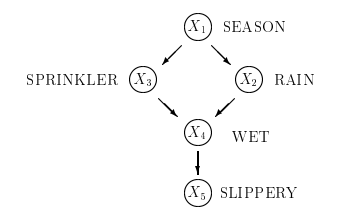

Сеть отражает вероятностные связи. Рассмотрим как мы можем делать предположения исходя из наблюдаемых значений отдельных переменных:
- Если включен разбрызгиватель (sprinkler), то вероятно то дороги вероятно мокрые (wet). Такой тип рассуждений называется предсказанием.
- Если кто-то подскользнулся (slippery), то это повышает вероятность (то есть нашу *уверенность - вероятность в байесовском смысле*) того, что сейчас мокро. Такой тип рассуждений называется силлогизм (abduction).
- Если дорогие мокрые, это повышает вероятность того, что сейчас идет дождь или включен разбрызгиватель (силлогизм).
- Если затем мы видим, что включен разбрызгиватель, то это понижает правдоподобие того, что сейчас идет дождь. Такой тип рассуждений называется explaining away, что можно перевести как "оправдание". Согласно авторам, такой тип рассуждений особенно сложно поддается нейронным сетям или экспертным системам.

### Формальные свойства байесовских сетей

Полное совместное распределение случайных переменных задается следующей формулой:

$P(x_1, ..., x_n) = \prod_i P(x_i|{parents}_i)$

То есть произведение условных вероятностей каждой случайной величины при значениях ее родительских вершин (из которых стрелки идут в данную вершину). Например, для описанной выше сети формула расписывается таким образом:

$P(x_1, x_2, x_3, x_4, x_5) = P(x_1)P(x_2|x_1)P(x_3|x_1)P(x_4|x_2, x_3)P(x_5|x_4)$

Такая запись называется в математике *факторизацией*, то есть разложением сложного объекта в произведение более простых составляющих. То есть мы осуществляем факторизацию функции совместного распределения. Заметим, что это возможно не всегда, а только когда нет других зависимостей между переменными. Это формально описывается следующим свойством: *при фиксированных значениях родителей вершина является [независимой](https://en.wikipedia.org/wiki/Independence_(probability_theory)) от своих более далеких предков*. Например:

$P(x_4|x_1, x_2, x_3) = P(x_4|x_2, x_3)$

Для переменной $x_4$ переменная $x_1$ не является родительской вершиной графа, поэтому эти переменные независимы при фиксированных $x_2$, $x_3$, и $x_1$ можно убрать из формулы условной вероятности.

### Формальный вывод в байесовских сетях

Статистический вывод в байесовской сети означает следующую задачу: зная распределение вероятностей набора переменных, найти распределения вероятностей остальных переменных. Например, мы хотим найти вероятность того, что включен разбрызгиватель, если дорога скользкая. Это делается в 3 шага:

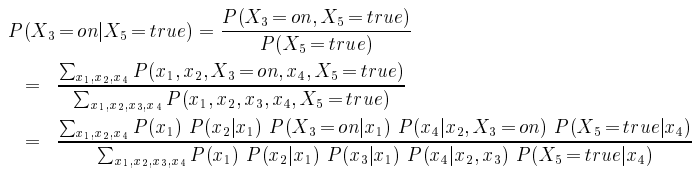

**Шаг 1.** Расписать формулу условной вероятности.

**Шаг 2.** Подставить недостающие переменные и прийти к сумме полных совместных распределений по всем возможным значениям остальных переменных (или интегралу в непрерывном случае).

**Шаг 3.** Факторизовать совместные распределения.

Полученные выражения можно далее упрощать. Но в более сложных байесовских сетях в итоге мы все равно можем получить очень длинные выражения с суммами или интегралами, не поддающиеся аналитическому подсчету. Однако любые, сколь угодно сложные интегралы можно посчитать численно с помощью метода Монте-Карло.

### Виды байесовских сетей

Далее авторы проводят краткий обзор разнообразных видов и обобщений байесовских сетей.

**Динамические байесовские сети.** В таких для каждой переменной задается временной ряд ее состояний. Переменные делятся на тва типа: скрытые $X_t$, описывающие состояние системы в момент времени $t$, и сенсорные (наблюдаемые) переменные $E_t$. Вероятностные зависимости описываются двумя моделями: сенсорная модель $P(E_t|X_t)$ описывает условную вероятность наблюдаемого состояния системы $E_t$ при заданном внутреннем состоянии $X_t$. Модель перехода $P(X_{t+1}|X_t)$ описывает условную вероятность состояния системы в момент времени $t+1$ при заданном состоянии в момент времени $t$. Задачей является расчет вероятностей состояния системы в каждый момент времени, имея все ее наблюдаемые состояния: $P(X_t|E_1, ..., E_t)$. Динамические байесовские сети более выразительны, чем другие вероятностные временные модели, такие как марковские сети и фильтры Калмана, то есть эти модели являются частными случаями динамических байесовских сетей.

**Обучение в байесовских сетях.** До сих пор ничего не говорилось о том, могут ли байесовские сети учиться, выявляя неизвестные зависимости между переменными. Оказывается, могут. Условные вероятности $P(x_i|{parents}_i)$ могут обновляться на основе наблюдаемых данных с использованием градиентного спуска или [EM-методов](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm) аналогично тому, как обновляются веса в нейронных сетях. Структура сети также может быть обучаемой, используя методы, основанные на компромиссе между сложностью сети и ее соответствию наблюдаемым данным.

**Причинно-следственные сети (causal networks).** Рассмотрим приведенную ранее байесовскую сеть. Что будет если включить разбрызгиватель: какое влияние это окажет на сезон или на связь между влажностью и скользкостью? В ее текущем виде сеть не дает ответов на эти вопросы. Причинно-следственная сеть - это модификация байесовской сети с дополнительным условием: родительские переменные являются непосредственными причинами дочерней переменной. Другой пример: ${fire} \rightarrow {smoke}$ - это причинно-следственная сеть, тогда как ${smoke} \rightarrow {fire}$ - это байесовская сеть, не являющаяся причинно-следственной, хотя обе сети могут выразить любое совместное распределение этих двух переменных. Причинно-следственные сети более удобны для предсказания следствий действий, совершаемых неким интеллектуальным агентом.

**Функциональные байесовские сети.** Снова рассмотрим приведенную ранее байесовскую сеть. Пусть мы наблюдаем, что дороги мокрые и включен разбрызгиватель. Ответ на вопрос "какова вероятность того, что дороги были бы сухими, если бы разбрызгиватель был выключен?" не может быть вычислен в текущей сети. Чтобы вычислять ответы на такие вопросы, условные вероятности $P(x_i|{parents}_i)$ нужно заменить на стохастические зависимости $x_i = f_i({parents}_i, \epsilon_i)$, где $\epsilon_i$ - случайная погрешность. Зная функцию $f_i$ и распределение вероятностей ошибки $\epsilon_i$, можно вычислить ответ на приведенный выше вопрос.

**Обнаружение причинно-следственных связей (causal discovery).** Было обнаружено, что с пмоощью байесовских сетей можно обнаруживать причинно-следственные связи в обучающих данных. Например, если события $A$ и $B$ зависимы, события $B$ и $C$ зависимы, но события $A$ и $C$ независимы, то из этого можно почти наверняка сделать вывод, что $A$ и $C$ являются причинами, а $B$ является следствием. Подобные паттерны моэно использовать для построения сети причинно-следственных связей из обучающих данных.

**Бинарная уверенность "да/нет" (plain belief).** В повседневном принятии решений люди часто руковоствуются простыми (*plain*) суждениями о том, что что-то верно или неверно, не думая о вероятностях - это делает принятие решений проще. В байесовские сети можно встроить такую же схему, введя вероятности, бесконечно близкие к нулю или единице.

**Модель сознания.** В сравнении с нейронными сетями, вершины графа в байесовских сетях интерпретируемы и означают интересующие нас предположения. Еще одним преимуществом байесовских сетей является легкость такого типа логического вывода, как "explaining away" (мы рассматривали его выше), который плохо поддается нейронным сетям.

*От автора обзора: здесь можно провести параллель с XOR задачей: она хоть и решается нейронными сетями, но существенно сложнее AND или OR задач, и решение в какой-то степени выглядит искусственным. В основе нейронной сети лежит линейная регрессия, которая в целом не совсем соответствует такому типу задач.*

Автор статьи ставит вопросы: можно ли построить на основе байесовских сетей модель человеческого сознания? Существует ли в где-то в человеческом мозге аналог байесовской сети? И как байесовская сеть может делать предположения как об индивидуальных объектах (например о конкретных людях), так и о классах объектах (например людях в целом)? Данные вопросы остаются открытыми.